In [2]:
#Importing libraries
import numpy as nmpy
import matplotlib.pyplot as mplt
import pandas as pnds
import seaborn as sbrn 
import sklearn

#add cleaned set
ds =  pnds.read_csv("bike_buyers_clean.csv")

In [3]:
from sklearn import preprocessing #imported library for encoding

l_e = preprocessing.LabelEncoder() #for each different variable encoded(tranformation to get all varaibles in the same data type)

ds['Marital Status'] = l_e.fit_transform(ds['Marital Status']) #same process for each variable except int values
ds['Gender'] = l_e.fit_transform(ds['Gender'])
ds['Education'] = l_e.fit_transform(ds['Education'])
ds['Occupation'] = l_e.fit_transform(ds['Occupation'])
ds['Home Owner'] = l_e.fit_transform(ds['Home Owner'])
ds['Commute Distance'] = l_e.fit_transform(ds['Commute Distance'])
ds['Region'] = l_e.fit_transform(ds['Region'])
ds['Purchased Bike'] = l_e.fit_transform(ds['Purchased Bike'])

#print transformed values
ds.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1


In [4]:
X = ds.drop(['Purchased Bike'], axis=1)#independent variable(all values except "purchased bike")
y = ds['Purchased Bike'] #the dependent variable (purchased bike or not= 0 or 1)

In [5]:
from sklearn.model_selection import train_test_split #imported for data decomposition

#separates data at random into two parts, test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state = 0) 
#test sample= 200 test set, training sample= 800 training set
X_train.shape, X_test.shape #displays sets

((800, 12), (200, 12))

In [6]:
y_train #since it is a traing set it shows 800 values about if bike purchased or not (0 or 1)

687    0
500    0
332    1
979    0
817    1
      ..
835    1
192    0
629    0
559    0
684    0
Name: Purchased Bike, Length: 800, dtype: int32

In [7]:
#import GNB classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() #Created the gnb object that we will create from the GaussianNB class
gnb.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = gnb.predict(X_test) #We made predictions with the model we created using our separated x test set (X_test),
# and compared the set (y_pred) with our target variable (y_test) test set.

In [9]:
from sklearn.metrics import accuracy_score

#calculate and display model-accuracy score
mas = accuracy_score(y_test,y_pred)
print('accuracy score of the model is -> {0:0.4f}'.format(mas))

accuracy score of the model is -> 0.6100


In [10]:
#calculate and display Training-set accuracy score
y_pred_train = gnb.predict(X_train)
tsas=accuracy_score(y_train, y_pred_train)
print('accuracy score of the training set is -> {0:0.4f}'. format(tsas))

accuracy score of the training set is -> 0.6225


In [11]:
from sklearn.metrics import confusion_matrix
#creates error matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(conf_mat)

Confusion matrix
[[59 40]
 [38 63]]


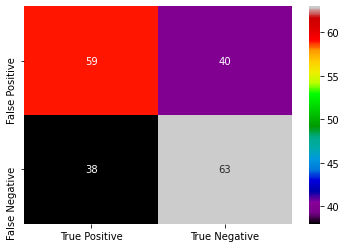

In [13]:
#create visualization object for confusion matrix
visual_matrix = pnds.DataFrame(data=conf_mat, columns=['True Positive', 'True Negative'], 
                                 index=['False Positive', 'False Negative'])

sbrn.heatmap(visual_matrix, annot=True, fmt='d', cmap='nipy_spectral') #visualization setting 
mplt.show()